## A07: Evolutionary Algorithm

In [4]:
import numpy as np
import matplotlib.pyplot as plt

This is the evolutionary algorithm class developed on the lectures. This algorithm works for real-valued problems. Feel free to use it, extend it, modify it, or create your own.

In [5]:
class MicrobialGA():
    
    def __init__(self, fitnessFunction, popsize, genesize, recombProb, mutatStd):
        self.fitnessFunction = fitnessFunction
        self.popsize = popsize
        self.genesize = genesize
        self.recombProb = recombProb
        self.mutatStd = mutatStd 
        self.pop = np.random.rand(popsize,genesize)*2 - 1
        
    def best(self):
        bestfit = 0
        for i in range(self.popsize):
            fit = self.fitnessFunction(self.pop[i])
            if fit > bestfit:
                bestfit = fit
        return bestfit
                    
    def runTournament(self):

        # Step 1: Pick 2 individuals at random from the population
        a = np.random.randint(self.popsize)
        b = np.random.randint(self.popsize)
        while (a==b):   # Make sure they are two different individuals
            b = np.random.randint(self.popsize)

        # Step 2: Compare their fitness
        if (self.fitnessFunction(self.pop[a]) > self.fitnessFunction(self.pop[b])):
            winner = a
            loser = b
        else:
            winner = b
            loser = a

        # Step 3: Transfect loser with winner
        for gene in range(self.genesize):
            if (np.random.random() < self.recombProb):
                self.pop[loser][gene] = self.pop[winner][gene]

        # Step 4: Mutate loser and Make sure new organism stays within bounds
        self.pop[loser] += np.random.normal(0.0,self.mutatStd,size=self.genesize)
        self.pop[loser] = np.clip(self.pop[loser],-1,1)

This code exemplifies how to use the class by getting it to solve a very trivial problem: the maximization of ones in a genotype of 10 values. Note we have to create our own fitness function that solves the problem at hand. Note that this fitness function maximizes the number of ones in a genotype because each gene can only take a value between -1 and 1.
We use a population size of 50 individuals. We will pick a recombination probability of 50% and a mutation standard deviation of 0.1. We run the algorithm for 100 generations, where each generation entails running as many tournaments as there are individuals in the population. To make sure that the optimization is working, we visualize the best fitness in the population over time.

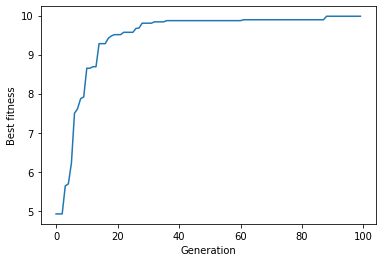

In [6]:
genesize = 10
popsize = 50
recombProb = 0.5
mutatProb = 0.1
generations = 100

def fitnessFunction(genotype):
    return np.sum(genotype)

ga = MicrobialGA(fitnessFunction, popsize, genesize, recombProb, mutatProb)

bestfithist = np.zeros(generations)

for i in range(generations):
    for j in range(popsize):
        ga.runTournament()
    bestfithist[i] = ga.best()

plt.plot(bestfithist)
plt.ylabel("Best fitness")
plt.xlabel("Generation")
plt.show()

1. (6 points) Write some code to find the solution to the Ackley Function (https://en.wikipedia.org/wiki/Ackley_function). Note that the function is a minimization problem. Meaning solutions with lower value are better than solutions with larger values. Note also that the Ackley function receives two parameters and gives you a value. The two parameters that the function takes (x and y) will be the genotype. The result of the function will be the fitness. We know the solution should be f(0,0)=0. So your evolutionary algorithm should find a genotype that approximates the genotype 0,0.

2. (6 points) Write some code to find the solution to the Card Problem. You have 10 cards numbered from 1 to 10. You have to choose a way of dividing them into 2 piles, so that the cards in first pile sum to a number as close as possible to 36, and the remaining cards in the second pile multiply to a number as close as possible to 360. Note that you have to figure out what the best genotype encoding is for this problem. Also, importantly, note that the algorithm provided works best for real-valued genotypes. The genotype for this problem will most likely need to be a discrete genotype (0s and 1s) or something similar. You might have to copy and paste the evolutionary algorithm class and make some changes to it to accomodate this change from real values to discrete values. Hint: The main thing that changes is the initialization of the population and the mutation operation. Instead of adding random values to every real-value, you might want to flip some 0s to 1s and some 1s to 0s here and there at random. In addition to solving the problem, tell us: how did you encode the solutions in the genotype? and what fitness function did you use? Did the evolutionary algorithm find the correct optimal answer? What was the answer to the problem? 

3. (9 points) Open-ended problem. The main two parameters of an evolutionary algorithm are its mutation operator and its recombination operator. Pick one (or if you are ambitious you can do the study for both) and understand the effect that the parameter has on the efficiency of the evolutionary algorithm. So, for example, the question that we are asking is: For the Ackley function, does a large mutation or a small mutation work best to find the solution quickest? Is there a sweetspot? Does a little recombination, medium, or lots of recombination work best? Does recombination help at all? What happens if we set it to 0? Or to 1.0? Is there a sweetspot? I used the Ackley function as an example, but you are welcome to explore any other problem (there are lots of functions here: https://en.wikipedia.org/wiki/Test_functions_for_optimization). Find a way to visualize the results of your experiments and to interpret your results. 